In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import umap

%config InlineBackend.figure_format = 'retina'

/Users/prihodad/Documents/bioinformatics/projects/oas-humanization/condaenv/lib/python3.8/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
heavy_umap = pd.read_csv('../../data/oas_stats/sequence_similarity/oas_40k_umap_heavy.csv', index_col=0, low_memory=False)

# Remove germlines with low number of samples
heavy_umap = heavy_umap[~heavy_umap['v_gene_family'].isin(['IGHV9','IGHV8','IGHV11'])]

heavy_umap['v_gene_family'] = heavy_umap['v_gene_family'].str.replace('IG','')
heavy_umap.head()

,UMAP-1,UMAP-2,study_path,subject,unit_path,chain_type,v_gene_family,v_gene,j_gene_family,j_gene,...,128,domain_no,hmm_species,e-value,score,seqstart_index,seqend_index,identity_species,v_identity,j_identity
80,42.792440,15.185617,Bernat_2019,Bernat_2019:A007,Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...,H,HV1,IGHV1-46*01,IGHV1,IGHJ4*02,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,65.875360,10.700326,Bernat_2019,Bernat_2019:A007,Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...,H,HV1,IGHV1-69*02,IGHV1,IGHJ4*02,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,40.056930,13.530003,Bernat_2019,Bernat_2019:A007,Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...,H,HV1,IGHV1-46*01,IGHV1,IGHJ2*01,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,73.374760,0.632563,Bernat_2019,Bernat_2019:A007,Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...,H,HV1,IGHV1-18*01,IGHV1,IGHJ2*01,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,62.685246,10.706109,Bernat_2019,Bernat_2019:A007,Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...,H,HV1,IGHV1-69*02,IGHV1,IGHJ4*02,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
light_umap = pd.read_csv('../../data/oas_stats/sequence_similarity/oas_40k_umap_light.csv', index_col=0, low_memory=False)

# Remove germlines with low number of samples
light_umap = light_umap[~light_umap['v_gene_family'].isin(['IGLV9','IGLV11','IGKV7'])]

light_umap['v_gene_family'] = light_umap['v_gene_family'].str.replace('IG','')

light_umap.head()

,UMAP-1,UMAP-2,study_path,subject,unit_path,chain_type,v_gene_family,v_gene,j_gene_family,j_gene,...,127,domain_no,hmm_species,e-value,score,seqstart_index,seqend_index,identity_species,v_identity,j_identity
80,-4.535329,27.429570,Bernat_2019,Bernat_2019:A007,Bernat_2019_Light_IgK_Light_IgK_A007,K,KV1,IGKV1-5*03,IGKV1,IGKJ1*01,...,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,-2.675264,24.461090,Bernat_2019,Bernat_2019:A007,Bernat_2019_Light_IgK_Light_IgK_A007,K,KV1,IGKV1-5*03,IGKV1,IGKJ3*01,...,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,-0.741606,58.698910,Bernat_2019,Bernat_2019:A007,Bernat_2019_Light_IgK_Light_IgK_A007,K,KV1,IGKV1-8*01,IGKV1,IGKJ2*01,...,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,1.307230,45.958523,Bernat_2019,Bernat_2019:A007,Bernat_2019_Light_IgK_Light_IgK_A007,K,KV1,IGKV1-9*01,IGKV1,IGKJ5*01,...,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,10.857225,39.553055,Bernat_2019,Bernat_2019:A007,Bernat_2019_Light_IgK_Light_IgK_A007,K,KV1,IGKV1-17*01,IGKV1,IGKJ1*01,...,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
HEAVY_GERMLINES = ['HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7']
LIGHT_GERMLINES = [
    'KV1', 'KV1D', 'KV2', 'KV2D', 'KV3', 'KV3D', 'KV4', 'KV5', 'KV6', 'KV6D', 
    'LV1', 'LV2', 'LV3', 'LV4', 'LV5', 'LV6', 'LV7', 'LV8', 'LV10'
]

In [5]:
HEAVY_GERMLINE_COLORS = {g: plt.get_cmap('tab10')(i) for i, g in enumerate(HEAVY_GERMLINES)}
LIGHT_GERMLINE_COLORS = {g: plt.get_cmap('tab20')(i) for i, g in enumerate(LIGHT_GERMLINES)}

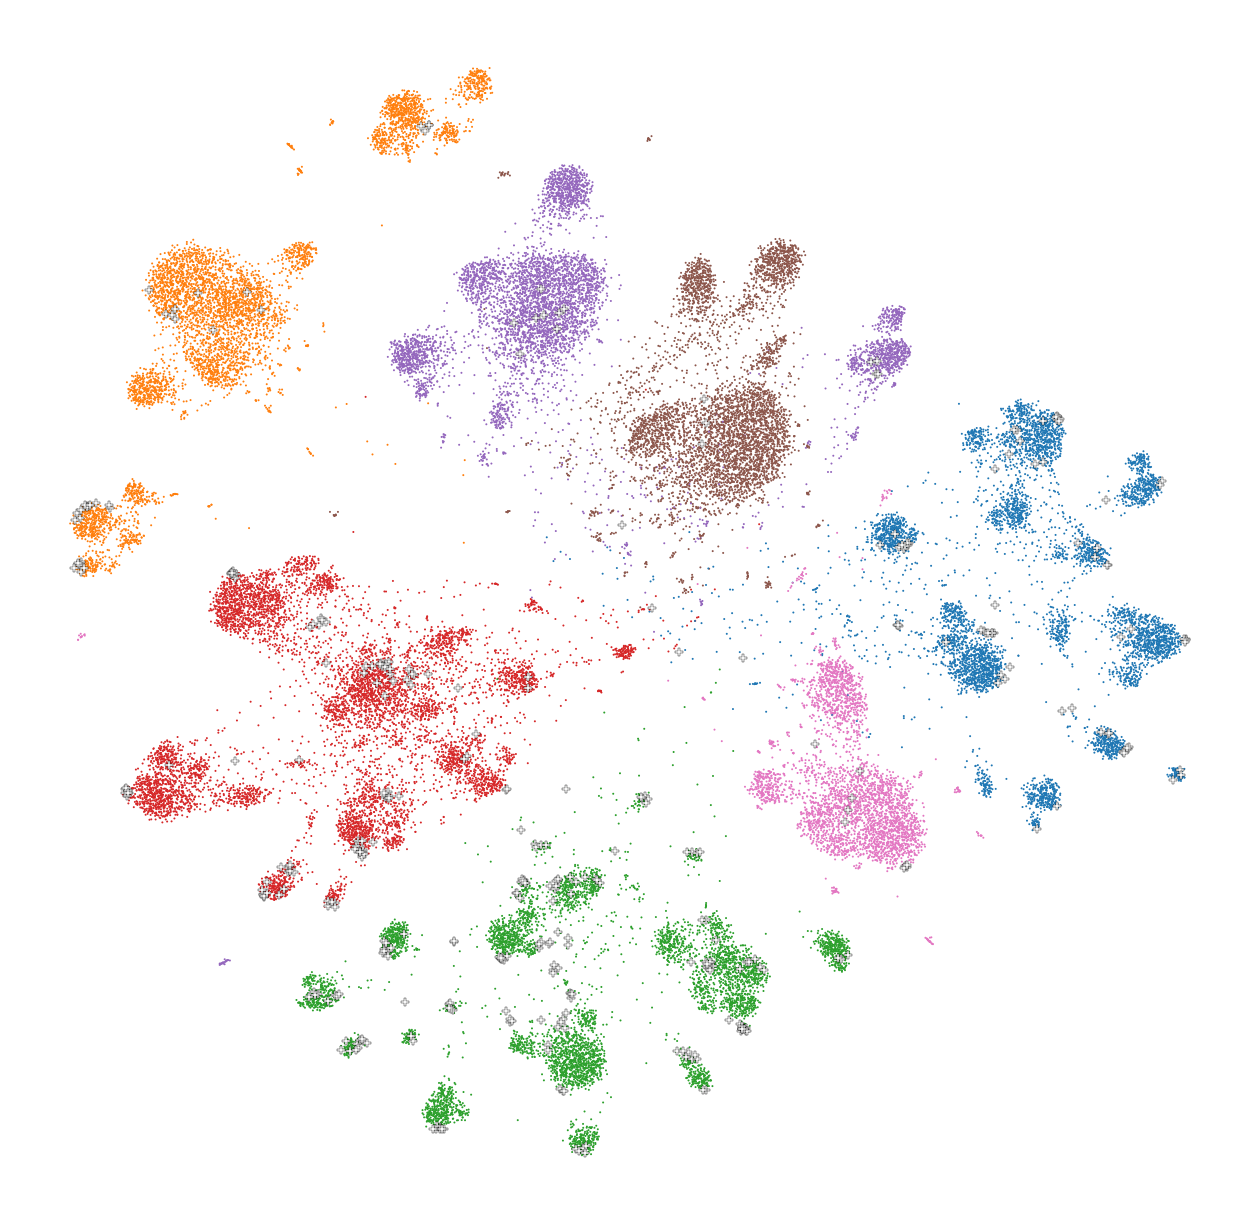

In [16]:
fig, ax = plt.subplots(figsize=(11, 11))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=HEAVY_GERMLINE_COLORS,
    hue_order=HEAVY_GERMLINES,
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=heavy_umap[heavy_umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=20,
    color='white',
    marker='P',
    linewidth=0.2,
    edgecolor='black',
    label='Germline',
    ax=ax
);
ax.legend().remove()
plt.axis('off')
plt.savefig('../../work/scatter-heavy.png', bbox_inches='tight', dpi=300)

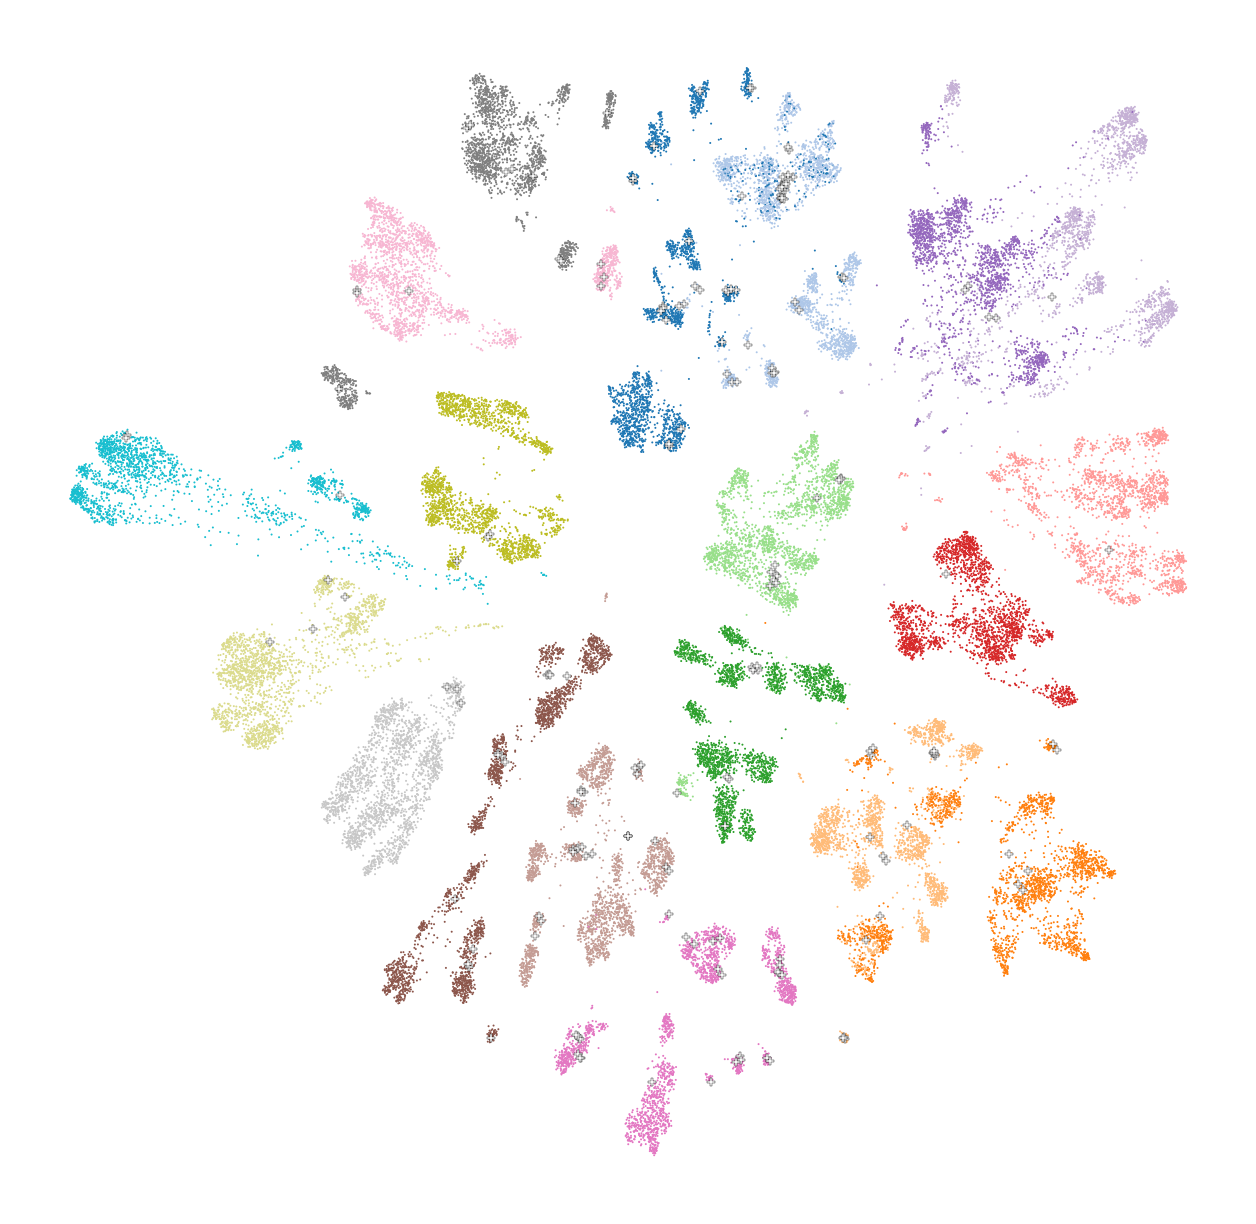

In [15]:
fig, ax = plt.subplots(figsize=(11, 11))
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=LIGHT_GERMLINE_COLORS,
    hue_order=LIGHT_GERMLINES,
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=light_umap[light_umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=20,
    color='white',
    marker='P',
    linewidth=0.2,
    edgecolor='black',
    label='Germline',
    ax=ax
);
ax.legend().remove()
plt.axis('off')
plt.savefig('../../work/scatter-light.png', bbox_inches='tight', dpi=300)